# Activation Functions

This notebook explores the activation functions that are available in conx.

First, we import a special function `plot_f` that is designed to plot functions. We also import all of the activation functions:

* softmax
* elu
* selu
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* linear

There additional advanced activation functions not defined and examined here, including:

* ThresholdedReLU - Thresholded Rectified Linear Unit
* LeakyReLU - Leaky version of a Rectified Linear Unit
* PReLU - Parametric Rectified Linear Unit

In [1]:
from conx.activations import *
from conx import choice, plot_f

Using Theano backend.
conx, version 3.5.9


## softmax

The `softmax` activation function is unique in that the value of the activation function depends on the other output activations. So, this function takes an entire tensor as input.

The output of the softmax are said to sum to zero, but often they aren't exactly zero. These can be used as propabilities, especially using the conx `choice` function.

In [2]:
help(softmax)

Help on function softmax in module conx.activations:

softmax(tensor, axis=-1)
    Softmax activation function.
    
    >>> len(softmax([0.1, 0.1, 0.7, 0.0]))
    4



In [2]:
softmax([0.1, 0.1, 0.7, 0.0])

[0.21155263483524323,
 0.21155263483524323,
 0.38547399640083313,
 0.19142073392868042]

In [3]:
sum(softmax([0.1, 0.1, 0.7, 0.0]))

1.0

In [4]:
choice(p=softmax([0.1, 0.1, 0.7, 0.0]))

1

Let's see how softmax can be used to make probabilistic choices, and see if they match our expectations:

In [5]:
bin = [0] * 4
for x in range(100):
    pick = choice([0, 1, 2, 3], p=softmax([0.1, 0.1, 0.7, 0.0]))
    bin[pick] += 1
print("softmax:", softmax([0.1, 0.1, 0.7, 0.0]))
print("picks  :", [b/100 for b in bin])

softmax: [0.21155263483524323, 0.21155263483524323, 0.38547399640083313, 0.19142073392868042]
picks  : [0.19, 0.22, 0.38, 0.21]


In [6]:
f = lambda x: softmax([x, .5, .1, 1])

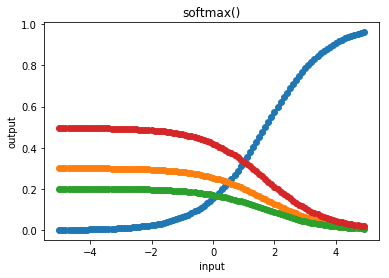

In [7]:
plot_f(f, frange=(-5, 5, .1), xlabel="input", ylabel="output", title="softmax()")

## elu

In [3]:
help(elu)

Help on function elu in module conx.activations:

elu(x, alpha=1.0)
    Exponential Linear Unit activation function.
    
    See: https://arxiv.org/abs/1511.07289v1
    
    def elu(x):
        if x >= 0:
            return x
        else:
            return alpha * (math.exp(x) - 1.0)
    
    >>> elu(0.0)
    0.0
    >>> elu(1.0)
    1.0
    >>> elu(0.5, alpha=0.3)
    0.5
    >>> round(elu(-1), 1)
    -0.6



In [8]:
elu(0.5)

0.5

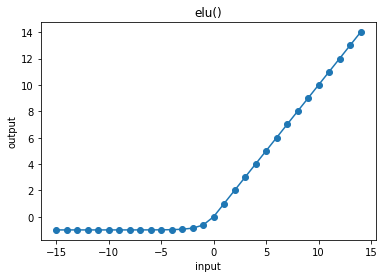

In [9]:
plot_f(elu, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="elu()")

In [10]:
elu(0.5, .3)

0.5

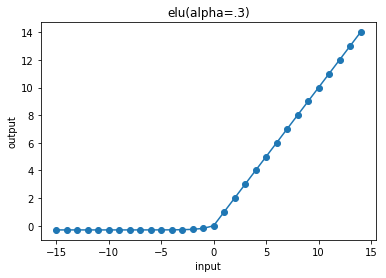

In [11]:
plot_f(lambda x: elu(x, .3), frange=(-15, 15, 1), xlabel="input", ylabel="output", title="elu(alpha=.3)")

## selu

In [4]:
help(selu)

Help on function selu in module conx.activations:

selu(x)
    Scaled Exponential Linear Unit activation function.
    
    >>> selu(0)
    0.0



In [12]:
selu(0.5)

0.5253505110740662

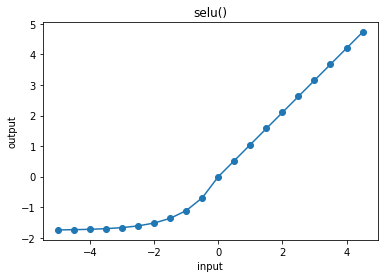

In [13]:
plot_f(selu, frange=(-5, 5, 0.5), xlabel="input", ylabel="output", title="selu()")

## softplus

In [5]:
help(softplus)

Help on function softplus in module conx.activations:

softplus(x)
    Softplus activation function.
    
    >>> round(softplus(0), 1)
    0.7



In [14]:
softplus(0.5)

0.9740769863128662

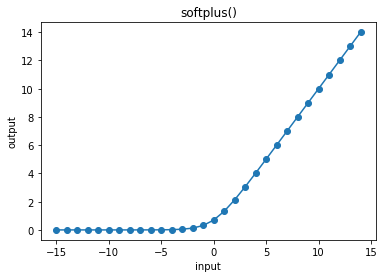

In [15]:
plot_f(softplus, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="softplus()")

## softsign

In [6]:
help(softsign)

Help on function softsign in module conx.activations:

softsign(x)
    Softsign activation function.
    
    >>> softsign(1)
    0.5
    >>> softsign(-1)
    -0.5



In [16]:
softsign(0.5)

0.3333333432674408

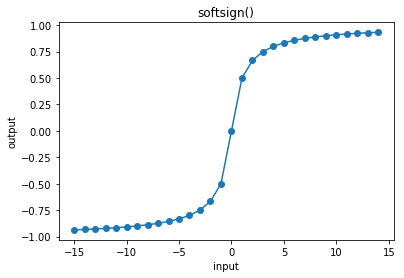

In [17]:
plot_f(softsign, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="softsign()")

## relu

In [7]:
help(relu)

Help on function relu in module conx.activations:

relu(x, alpha=0.0, max_value=None)
    Rectified Linear Unit activation function.
    
    >>> relu(1)
    1.0
    >>> relu(-1)
    0.0



In [18]:
relu(0.5)

0.5

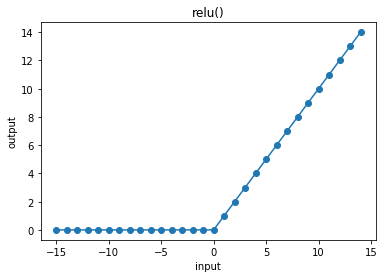

In [19]:
plot_f(relu, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="relu()")

## tanh

In [8]:
help(tanh)

Help on function tanh in module conx.activations:

tanh(x)
    Tanh activation function.
    
    >>> tanh(0)
    0.0



In [20]:
tanh(0.5)

0.46211716532707214

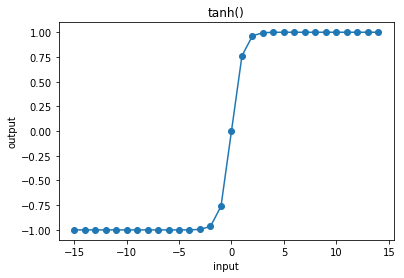

In [21]:
plot_f(tanh, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="tanh()")

## sigmoid

In [9]:
help(sigmoid)

Help on function sigmoid in module conx.activations:

sigmoid(x)
    Sigmoid activation function.
    
    >>> sigmoid(0)
    0.5



In [22]:
sigmoid(0.5)

0.622459352016449

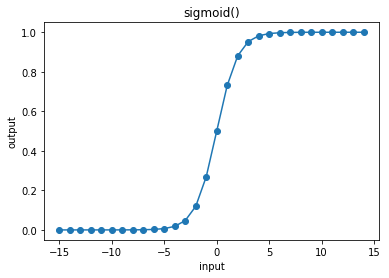

In [23]:
plot_f(sigmoid, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="sigmoid()")

## hard_sigmoid

In [10]:
help(hard_sigmoid)

Help on function hard_sigmoid in module conx.activations:

hard_sigmoid(x)
    Hard Sigmoid activation function.
    
    >>> round(hard_sigmoid(-1), 1)
    0.3



In [24]:
hard_sigmoid(0.5)

0.6000000238418579

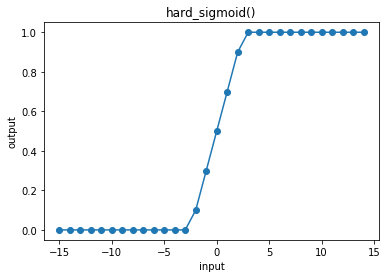

In [25]:
plot_f(hard_sigmoid, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="hard_sigmoid()")

## linear

In [11]:
help(linear)

Help on function linear in module conx.activations:

linear(x)
    Linear activation function.
    
    >>> linear(1) == 1
    True
    >>> linear(-1) == -1
    True



In [26]:
linear(0.5)

0.5

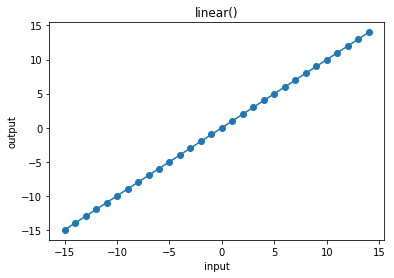

In [27]:
plot_f(linear, frange=(-15, 15, 1), xlabel="input", ylabel="output", title="linear()")

## Comparison

In [28]:
from conx import frange, plot

In [29]:
functions = [hard_sigmoid, sigmoid, tanh, relu, 
             softsign, softplus, elu, selu, linear]
float_range = frange(-2, 2, .1)
lines = {}
symbols = {}
for v in float_range:
    for f in functions:
        if f.__name__ not in lines:
            lines[f.__name__] = []
            symbols[f.__name__] = "-"
        lines[f.__name__].append(f(v))

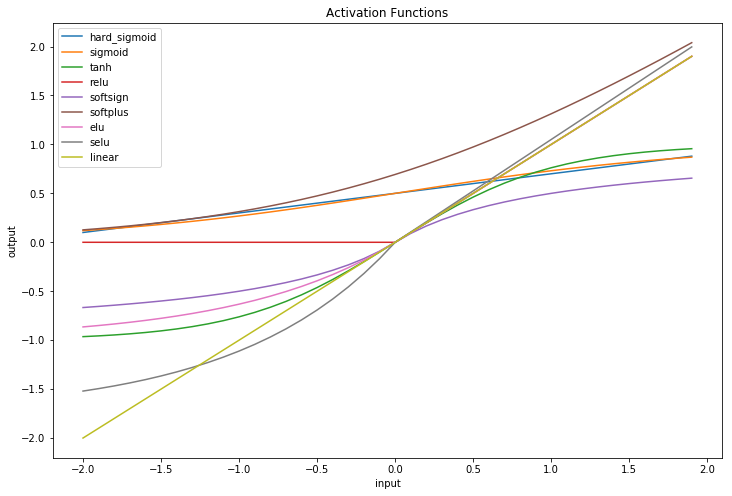

In [30]:
plot(list(lines.items()), xs=float_range, symbols=symbols, height=8.0, width=12.0, 
     title="Activation Functions", xlabel="input", ylabel="output")

See also the advanced activation functions:

https://keras.io/layers/advanced-activations/